# Notebook to plot spectrum from jdx file

In [6]:
import os
import numpy as np
import jcamp
import matplotlib.pyplot as plt

### Define jdx parsing function

In [31]:
def parse_jdx(jdx_path):
    try:
        jdx_data = jcamp.jcamp_readfile(jdx_path)
        
        # Extract wavenumber and transmittance/absorbance
        x = np.array(jdx_data['x'])
        y = np.array(jdx_data['y'])
        
        # Validate arrays have matching dimensions
        if len(x) != len(y):
            print(f"Dimension mismatch in {jdx_path}: x shape {x.shape}, y shape {y.shape}")
            return None
        
        # Check if data is absorbance and convert to transmittance if needed
        y_units = jdx_data.get('yunits', '').upper()
        y_factor = jdx_data.get('yfactor', 1)
        # apply yfactor to y
        y = y * y_factor
        if 'TRANSMITTANCE' in y_units:
            print(f"Converting transmittance to absorbance for {jdx_path}")
            y = -np.log10(y)
        
        # convert xunits to wavenumbers
        x_units = jdx_data.get('xunits', '').upper()
        x_factor = jdx_data.get('xfactor', 1)
        # apply xfactor to x
        x = x * x_factor
        if 'MICROMETERS' in x_units:
            print(f'Converting micrometers to wavenumbers for {jdx_path}')
            x = 1e4 / x
        
        # set all negative values to 0 (negative values are non physical)
        y = np.clip(y, 0, None)

        # normalise the data to the max transmittance
        y = y / np.max(y)

        # check if the full range of wavenumbers has reasonable data
        reasonable = check_reasonable_data(x, y)
        if not reasonable:
            print(f"Data is not reasonable for {jdx_path}")
            return None
        
        # Get state information
        state = jdx_data.get('state', '')
        
        # Return the data in the expected format
        return {
            'wavenumber': x.tolist(),
            'transmittance': y.tolist(),
            'state': state
        }
    except Exception as e:
        print(f"Error processing {jdx_path}: {str(e)}")
        return None

def check_reasonable_data(x, y):
    return True

Converting transmittance to absorbance for /Users/benji/phd/data/phd/attentivefp/jdx/B6002511-IR.jdx
Converting micrometers to wavenumbers for /Users/benji/phd/data/phd/attentivefp/jdx/B6002511-IR.jdx
{'wavenumber': [4916.420845624386, 4900.176543560512, 4884.0392332918, 4868.007861248535, 4852.081387648697, 4836.25878627315, 4820.737966281059, 4805.316448348326, 4789.993282513421, 4774.767530893223, 4759.63826749167, 4744.411889344374, 4729.282620794391, 4714.249535787849, 4699.3117200082415, 4684.468270691063, 4669.904965565988, 4655.4319300433835, 4641.048327421875, 4626.753331308666, 4612.546125461255, 4598.2449050986625, 4584.032092625319, 4569.906870781862, 4555.868432351185, 4541.915980004669, 4527.814181403796, 4513.799678653573, 4499.871663660152, 4486.02933827299, 4472.271914132379, 4458.8260410422445, 4445.460775565755, 4432.175395008768, 4418.96918529056, 4405.8414408158915, 4392.956649600909, 4380.147001237479, 4367.411840298074, 4354.75051895562, 4342.162396873643, 4329.4

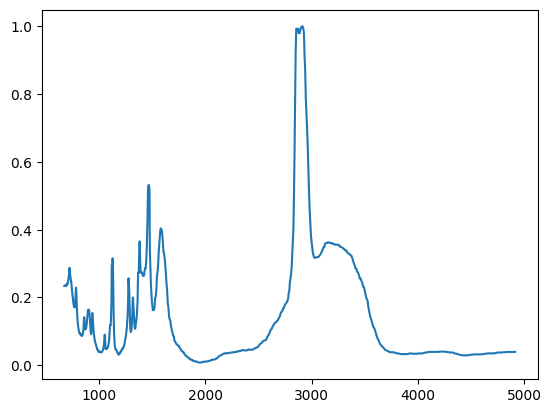

In [32]:
# cas_number = 'C6547531'
# cas_number = 'C81565186'
# cas_number = 'C89533459'
# cas_number = 'C1191679'
cas_number = 'B6002511'

jdx_data_path = '/Users/benji/phd/data/phd/attentivefp/jdx'

jdx_file_path = os.path.join(jdx_data_path, f'{cas_number}-IR.jdx')

ir_data = parse_jdx(jdx_file_path)
print(ir_data)

plt.plot(ir_data['wavenumber'], ir_data['transmittance'])
plt.show()